In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


Number of outliers detected: 27
Cleaned dataset saved to 'cleaned_dataset.csv'


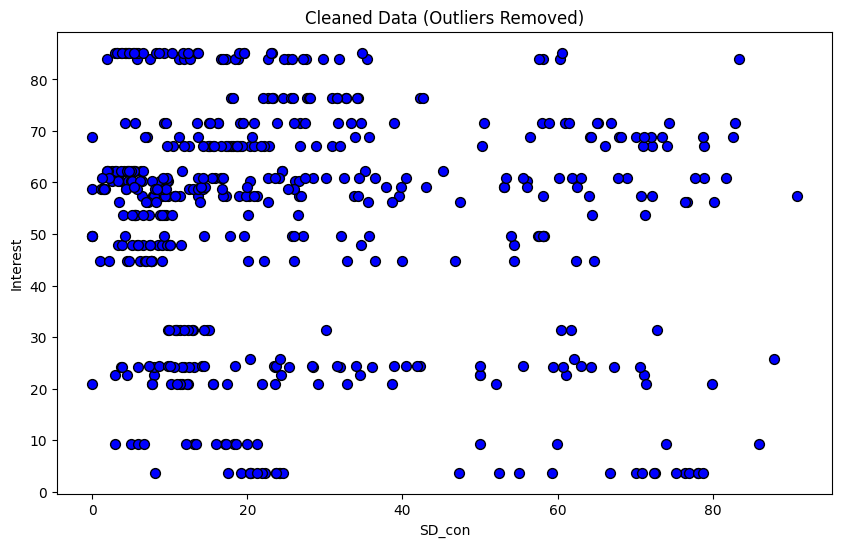

In [3]:
# Load the CSV file (adjust the path or encoding if necessary)
df = pd.read_csv("C:/Users/thisi/OneDrive/共有ファイル/卒研Bデータ/卒研後の遊び場/MissForest欠損値補完後.csv")

# Select only numeric columns for the Isolation Forest analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df[numeric_columns]

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_numeric)

# Predict outliers: -1 for outliers and 1 for inliers
df['outlier'] = iso_forest.predict(df_numeric)

# Print the number of detected outliers
num_outliers = (df['outlier'] == -1).sum()
print(f'Number of outliers detected: {num_outliers}')

# Delete the outliers; keep only the inliers (rows with outlier == 1)
df_cleaned = df[df['outlier'] == 1].copy()

# Optionally, drop the 'outlier' column if it's no longer needed
df_cleaned.drop(columns=['outlier'], inplace=True)

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_dataset.csv'")

# Optional: Visualize the cleaned data using the first two numeric features
if len(numeric_columns) >= 2:
    col1, col2 = numeric_columns[0], numeric_columns[1]
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cleaned[col1], df_cleaned[col2], c='blue', edgecolor='k', s=50)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Cleaned Data (Outliers Removed)')
    plt.show()
